In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#!pip install example --use-feature=2020-resolver

In [3]:
#!pip install --upgrade scikit-learn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
train=pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_training-set.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_testing-set.csv')
print("Traning data length",len(train))
print("Testing data length",len(test))

Traning data length 175341
Testing data length 82332


In [6]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


Text(0, 0.5, 'Frequency count')

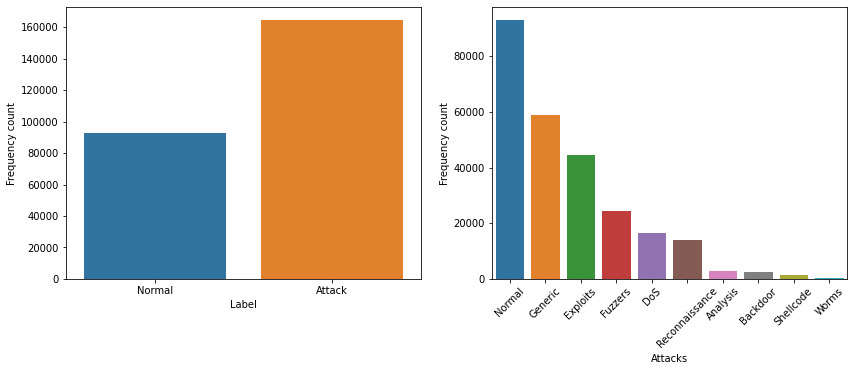

In [7]:
import seaborn as sns
f, axes = plt.subplots(1, 2, figsize=(14, 5))
df = pd.concat([train, test], ignore_index=True)
# Create the plots
sns.countplot(x="label", data=df,ax=axes[0])
sns.countplot(x="attack_cat", data=df, order = train['attack_cat'].value_counts().index)

axes[1].tick_params('x', labelrotation=45)
axes[0].set_xticklabels(["Normal", "Attack"])
axes[0].set_xlabel("Label")
axes[1].set_xlabel("Attacks")
axes[0].set_ylabel("Frequency count")
axes[1].set_ylabel("Frequency count")



In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [9]:
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [10]:
cat_val=(train.dtypes == np.object)
print(train.loc[:,cat_val].head())
list_cat=train.loc[:,cat_val].columns.tolist()
print(list_cat)
#print(train.loc[:,cat_val].values)

  proto service state attack_cat
0   tcp       -   FIN     Normal
1   tcp       -   FIN     Normal
2   tcp       -   FIN     Normal
3   tcp     ftp   FIN     Normal
4   tcp       -   FIN     Normal
['proto', 'service', 'state', 'attack_cat']


In [11]:
num_val=(train.dtypes != np.object)
list_cat=train.loc[:,num_val].columns.tolist()
print(list_cat)

['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label']


In [12]:
print(all((train.label==1) & (train.attack_cat!='Normal'))==False)
print(all((train.label!=1) & (train.attack_cat=='Normal'))==False)

True
True


In [13]:
mask=(train.label==1)
print(train.loc[mask,:].service.value_counts())
print(train.loc[mask,:].proto.value_counts())

-           57656
dns         39801
http        13376
smtp         3479
ftp          2210
ftp-data     1443
pop3         1101
dhcp           94
snmp           79
ssl            56
irc            25
ssh            11
radius         10
Name: service, dtype: int64
udp        49361
tcp        40825
unas       12084
ospf        2531
sctp        1150
           ...  
argus         98
netblt        98
bbn-rcc       98
egp           98
rdp           98
Name: proto, Length: 129, dtype: int64


In [14]:
mask = (train.label == 0)
print(train.loc[mask,:].service.value_counts())
print(train.loc[mask,:].proto.value_counts())

-           36512
dns          7493
http         5348
ftp-data     2552
smtp         1579
ssh          1291
ftp          1218
pop3            4
radius          2
snmp            1
Name: service, dtype: int64
tcp     39121
udp     13922
arp      2859
ospf       64
igmp       18
icmp       15
rtp         1
Name: proto, dtype: int64


In [15]:
print(train.columns.values)
print(test.columns.values)
print(len(train.columns.values))

['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']
['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']
45


In [16]:
df = pd.concat([train, test], ignore_index=True)

In [17]:
df['proto'].unique() 

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [18]:
df['service'].unique() 

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [19]:
df['service']= np.where(df['service'] == '-', 'None', df['service'])
df['service'].unique() 

array(['None', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [20]:
df['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no',
       'ACC', 'CLO'], dtype=object)

In [21]:
from sklearn import preprocessing
df.drop(['id', 'attack_cat'], inplace=True,axis=1)
le = preprocessing.LabelEncoder()

df['proto'] = le.fit_transform(df['proto'])
df['service'] = le.fit_transform(df['service'])
df['state'] = le.fit_transform(df['state'])


In [22]:
df['service'].unique() 

array([ 0,  3,  9, 10,  5,  4,  2, 11,  8,  7,  1, 12,  6])

In [23]:
df['state'].unique()

array([ 4,  5,  2,  3,  7,  8,  6,  9, 10,  0,  1])

In [24]:
df['proto'].unique() 

array([113, 119,   6,  78,  37,  42,  91,  20,  53,  12, 128,  87, 126,
        72,  83,  94,  15, 110,  60, 131,  44, 120,  68,   0,  56,  40,
         9, 111,  62,  16,  90, 127, 124,  36,  22,  24,   7,  31,  82,
       100,  79,  39, 132,  92,  71,  74,  28,  81,  46,  54,  93,  55,
       104,  47,  10, 118, 112,  76, 105,   2,  95,  97,  88,  96,  27,
         5,  80,  14, 125,  35, 109,  63, 107, 102,  59, 103,  29,  85,
        17, 106,  67,  38, 101,   3,  64,  48,  70,  26,  41, 115,   1,
        52,  34,  57,  98, 114,  32,  69,  21,  51, 123,  99, 121, 122,
        18,  49,  30,  45,  50, 108,   4,   8,  23,  25,  43,  77,  86,
       129,  13,  73,  19,  33,  84, 116, 130,  65,  66,  89,  58,  61,
        75, 117,  11])

In [25]:
print(df.columns)
df.head()

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0


In [26]:
y=df["label"]
df.drop(["label"], inplace=True, axis=1)

[0.01123162 0.01027391 0.02291325 0.02917199 0.00495944 0.00509209
 0.02054643 0.00697357 0.03314719 0.16101399 0.10998943 0.01831626
 0.04483844 0.00592148 0.00605165 0.01672335 0.00729066 0.0077532
 0.00752901 0.0426049  0.01497765 0.01349701 0.03163209 0.01292108
 0.01475985 0.01207502 0.03179644 0.02542852 0.00319351 0.00185218
 0.02913103 0.0865501  0.01496828 0.01547586 0.02073625 0.03180745
 0.00045324 0.00044394 0.00304637 0.01568083 0.03742286 0.00980857]
sttl                 0.161014
dttl                 0.109989
ct_state_ttl         0.086550
dload                0.044838
swin                 0.042605
ct_srv_dst           0.037423
rate                 0.033147
ct_dst_src_ltm       0.031807
smean                0.031796
dwin                 0.031632
state                0.029172
ct_srv_src           0.029131
dmean                0.025429
service              0.022913
ct_dst_sport_ltm     0.020736
sbytes               0.020546
sload                0.018316
sinpkt               

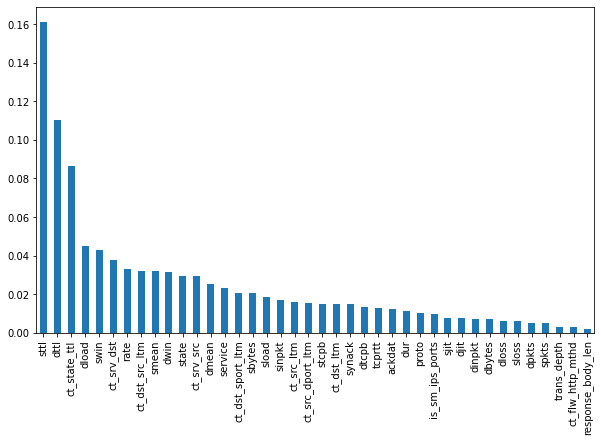

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(df,y)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(40).plot(kind='bar',stacked=True,figsize=(10,6))
print(feat_importances.nlargest(40))
x=feat_importances.nlargest(40)
plt.show()

In [28]:
l=[]
for i in range(38):
    l.append(x.index[i])
print(l)

['sttl', 'dttl', 'ct_state_ttl', 'dload', 'swin', 'ct_srv_dst', 'rate', 'ct_dst_src_ltm', 'smean', 'dwin', 'state', 'ct_srv_src', 'dmean', 'service', 'ct_dst_sport_ltm', 'sbytes', 'sload', 'sinpkt', 'ct_src_ltm', 'ct_src_dport_ltm', 'stcpb', 'ct_dst_ltm', 'synack', 'dtcpb', 'tcprtt', 'ackdat', 'dur', 'proto', 'is_sm_ips_ports', 'sjit', 'djit', 'dinpkt', 'dbytes', 'dloss', 'sloss', 'dpkts', 'spkts', 'trans_depth']


In [29]:
for i in df.columns:
    if i not in l:
        df.drop(i, inplace=True, axis=1)

In [30]:
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,113,0,4,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,1,0,1,1,1,1,1,1,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,43,1,1,1,1,2,1,6,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,7,1,2,1,1,3,2,6,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,1,1,2,1,1,3,2,1,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,43,1,2,2,1,40,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,119,0,5,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,1,2,2,1,1,2,2,1,0
257669,1.106101,113,0,4,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.700000,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,1,1,2,1,1,1,3,2,0
257670,0.000000,6,0,5,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,1,2,1,1,1,1,1,1,1
257671,0.000000,6,0,5,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.000000,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,1,2,1,1,1,1,1,1,1


In [31]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
df, y = smt.fit_resample(df, y)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [32]:
import collections
collections.Counter(y)

Counter({0: 155401, 1: 155401})

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= 0.28)

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [35]:
print(X_train.shape)
print(X_test.shape)

(223777, 38)
(87025, 38)


In [36]:
from sklearn.ensemble import RandomForestClassifier
clf=(RandomForestClassifier(n_estimators= 140,criterion='entropy',max_features=20))

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
acc= metrics.accuracy_score(y_test, y_pred)
print(acc)

0.9661706406205114


In [37]:
import joblib
joblib.dump(clf, "randomforest.joblib")

['randomforest.joblib']

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test, y_pred))
print('Log loss: ',log_loss(y_test, y_pred))
print('ROC AUC: ',roc_auc_score(y_test, y_pred))

Accuracy:  0.9661706406205114
Precision:  0.9712351155731963
Recall:  0.9604710228584622
F1 score:  0.9658230787090781
Log loss:  1.1684359989732964
ROC AUC:  0.9661442384108164


In [39]:
rf_accuracy="%.3f" % round(accuracy_score(y_test, y_pred),3)
rf_prec="%.3f" % round(precision_score(y_test, y_pred),3)
rf_rec="%.3f" % round(recall_score(y_test, y_pred),3)
rf_f1="%.3f" % round(f1_score(y_test, y_pred),3)
rf_lgloss="%.3f" %round(log_loss(y_test, y_pred),3)
rf_rocauc="%.3f" % round(roc_auc_score(y_test, y_pred),3)


Text(0.5, 1.0, 'Confusion matrix of model')

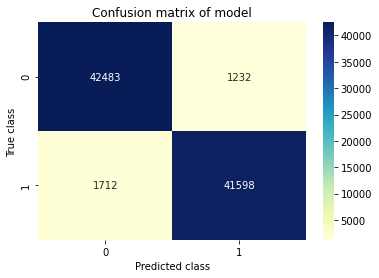

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43715
           1       0.97      0.96      0.97     43310

    accuracy                           0.97     87025
   macro avg       0.97      0.97      0.97     87025
weighted avg       0.97      0.97      0.97     87025



In [42]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import (precision_score, recall_score,f1_score)
from sklearn.metrics import average_precision_score,precision_recall_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred)


In [43]:
log = LogisticRegression(solver = "liblinear")
y_pred_log_fit = log.fit(X_train, y_train)
y_pred_log = y_pred_log_fit.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)

In [44]:
log_acc = "%.3f" %round(accuracy_score(y_test, y_pred_log),3)
log_prec="%.3f" %round(precision_score(y_test, y_pred_log),3)
log_rec="%.3f" %round(recall_score(y_test, y_pred_log),3)
log_f1="%.3f" %round(f1_score(y_test, y_pred_log),3)
log_lgloss="%.3f" %round(log_loss(y_test, y_pred_log),3)
log_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_log),3)

Text(0.5, 1.0, 'Confusion matrix of model')

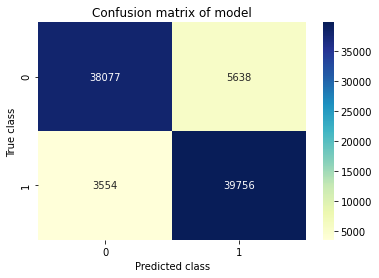

In [45]:
cf_matrix = confusion_matrix(y_test, y_pred_log)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [46]:
print('Accuracy: ',accuracy_score(y_test, y_pred_log))
print('Precision: ',precision_score(y_test, y_pred_log))
print('Recall: ',recall_score(y_test, y_pred_log))
print('F1 score: ',f1_score(y_test, y_pred_log))
print('Log loss: ',log_loss(y_test, y_pred_log))
print('ROC AUC: ',roc_auc_score(y_test, y_pred_log))

Accuracy:  0.8943751795461075
Precision:  0.8757985636868308
Recall:  0.917940429462018
F1 score:  0.8963744588744589
Log loss:  3.6482038581135354
ROC AUC:  0.8944843403171924


In [47]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     43715
           1       0.88      0.92      0.90     43310

    accuracy                           0.89     87025
   macro avg       0.90      0.89      0.89     87025
weighted avg       0.90      0.89      0.89     87025



In [48]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
roc_auc_log = auc(fpr_log, tpr_log)
precision_log, recall_log, th_log = precision_recall_curve(y_test, y_pred_log)

In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.layers import LSTM
model=Sequential()

model.add(Dense( units = 120, activation='relu', kernel_initializer='uniform'))

model.add(Dense(units = 200, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 100, activation='relu', kernel_initializer='uniform'))

model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))

In [104]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [106]:
model.fit(X_train, y_train, batch_size = 32,epochs=100)

Epoch 1/100
6994/6994 [==============================] - 15s 2ms/step - loss: 0.0417 - accuracy: 0.9402
Epoch 2/100
6994/6994 [==============================] - 15s 2ms/step - loss: 0.0407 - accuracy: 0.9416
Epoch 3/100
6994/6994 [==============================] - 15s 2ms/step - loss: 0.0399 - accuracy: 0.9426
Epoch 4/100
6994/6994 [==============================] - 15s 2ms/step - loss: 0.0393 - accuracy: 0.9438
Epoch 5/100
6994/6994 [==============================] - 15s 2ms/step - loss: 0.0387 - accuracy: 0.9453
Epoch 6/100
6994/6994 [==============================] - 16s 2ms/step - loss: 0.0383 - accuracy: 0.9458
Epoch 7/100
6994/6994 [==============================] - 15s 2ms/step - loss: 0.0381 - accuracy: 0.9459
Epoch 8/100
6994/6994 [==============================] - 15s 2ms/step - loss: 0.0378 - accuracy: 0.9460
Epoch 9/100
6994/6994 [==============================] - 15s 2ms/step - loss: 0.0375 - accuracy: 0.9466
Epoch 10/100
6994/6994 [==============================] - 15s 2m

In [107]:
acc=model.evaluate(X_test,y_test)
print('Accuracy',acc[1])
y_pred_ann=model.predict(X_test)

2720/2720 [==============================] - 3s 1ms/step - loss: 0.0339 - accuracy: 0.9536
Accuracy 0.9535995125770569


In [53]:
y_classes = model.predict_classes(X_test, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [54]:
ann_acc ="%.3f" % round(accuracy_score(y_test, y_classes),3)
ann_prec = "%.3f" % round(precision_score(y_test, y_classes))
ann_rec = "%.3f" % round(recall_score(y_test, y_classes),3)
ann_f1 = "%.3f" % round(f1_score(y_test, y_classes),3)
ann_lgloss = "%.3f" % round(log_loss(y_test, y_classes),3)
ann_rocauc = "%.3f" % round(roc_auc_score(y_test, y_classes),3)

Text(0.5, 1.0, 'Confusion matrix of model')

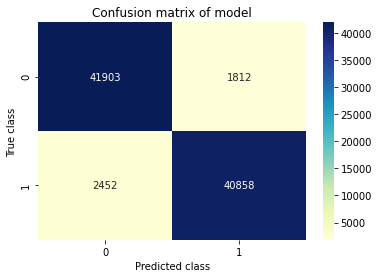

In [55]:
cf_matrix = confusion_matrix(y_test, y_classes)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [56]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     43715
           1       0.96      0.94      0.95     43310

    accuracy                           0.95     87025
   macro avg       0.95      0.95      0.95     87025
weighted avg       0.95      0.95      0.95     87025



In [57]:
model.save("ann.h5")

In [113]:
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
precision_ann, recall_ann, th_ann = precision_recall_curve(y_test, y_pred_ann)

In [116]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.05,
             n_estimators=1000,
             max_depth=10,
             min_child_weight=1,
             gamma=0,
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'binary:logistic',
             nthread=4,
             scale_pos_weight=1,
             seed=27)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [60]:
joblib.dump(xgb, "Xgboost.joblib")

['Xgboost.joblib']

In [117]:
xgb_accuracy="%.3f" %round(accuracy_score(y_test, y_pred_xgb),3)
xgb_prec="%.3f" %round(precision_score(y_test, y_pred_xgb),3)
xgb_rec="%.3f" %round(recall_score(y_test, y_pred_xgb),3)
xgb_f1="%.3f" %round(f1_score(y_test, y_pred_xgb),3)
xgb_lgloss="%.3f" %round(log_loss(y_test, y_pred_xgb),3)
xgb_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_xgb),3)

In [118]:
xgb_accuracy

'0.968'

Text(0.5, 1.0, 'Confusion matrix of model')

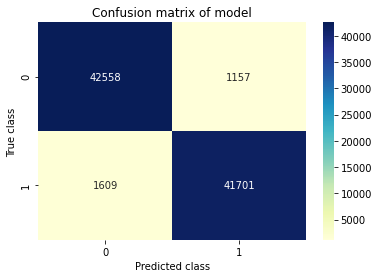

In [63]:
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [64]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43715
           1       0.97      0.96      0.97     43310

    accuracy                           0.97     87025
   macro avg       0.97      0.97      0.97     87025
weighted avg       0.97      0.97      0.97     87025



In [65]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test, y_pred_xgb)

In [66]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)

In [67]:
rc_accuracy=accuracy_score(y_test, y_pred_rc)

In [68]:
rc_accuracy

0.8732777937374318

In [69]:
rc_accuracy="%.3f" %round(accuracy_score(y_test, y_pred_rc),3)
rc_prec="%.3f" %round(precision_score(y_test, y_pred_rc),3)
rc_rec="%.3f" %round(recall_score(y_test, y_pred_rc),3)
rc_f1="%.3f" %round(f1_score(y_test, y_pred_rc),3)
rc_lgloss="%.3f" %round(log_loss(y_test, y_pred_rc),3)
rc_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_rc),3)

Text(0.5, 1.0, 'Confusion matrix of model')

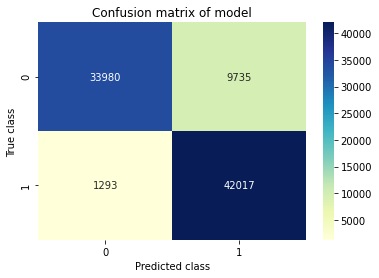

In [70]:
cf_matrix = confusion_matrix(y_test, y_pred_rc)
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [71]:
print(classification_report(y_test, y_pred_rc))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     43715
           1       0.81      0.97      0.88     43310

    accuracy                           0.87     87025
   macro avg       0.89      0.87      0.87     87025
weighted avg       0.89      0.87      0.87     87025



In [72]:
fpr_rc, tpr_rc, thresholds_rc = roc_curve(y_test, y_pred_rc)
roc_auc_rc = auc(fpr_rc, tpr_rc)
precision_rc, recall_rc, th_rc = precision_recall_curve(y_test, y_pred_rc)

In [73]:
sgd = SGDClassifier()
sgd_fit = sgd.fit(X_train, y_train)
y_pred_sgd = sgd_fit.predict(X_test)

In [74]:
sgd_accuracy="%.3f" %round(accuracy_score(y_test, y_pred_sgd),3)
sgd_prec="%.3f" %round(precision_score(y_test, y_pred_sgd),3)
sgd_rec="%.3f" %round(recall_score(y_test, y_pred_sgd),3)
sgd_f1="%.3f" %round(f1_score(y_test, y_pred_sgd),3)
sgd_lgloss="%.3f" %round(log_loss(y_test, y_pred_sgd),3)
sgd_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_sgd),3)

Text(0.5, 1.0, 'Confusion matrix of model')

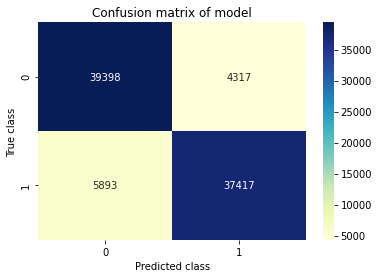

In [75]:
cf_matrix = confusion_matrix(y_test, y_pred_sgd)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [76]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     43715
           1       0.90      0.86      0.88     43310

    accuracy                           0.88     87025
   macro avg       0.88      0.88      0.88     87025
weighted avg       0.88      0.88      0.88     87025



In [77]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_sgd)
roc_auc_sgd= auc(fpr_sgd, tpr_sgd)
precision_sgd, recall_sgd, th_sgd = precision_recall_curve(y_test, y_pred_sgd)

In [93]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd',alpha = 1e-4, hidden_layer_sizes = (50,100,50), 
                          activation='logistic', 
                          random_state=1,
                          tol=1e-4,
                          learning_rate_init=.3, 
                          verbose=True)
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.35771897
Iteration 2, loss = 0.21378435
Iteration 3, loss = 0.20161457
Iteration 4, loss = 0.19190762
Iteration 5, loss = 0.18236738
Iteration 6, loss = 0.17535414
Iteration 7, loss = 0.17103809
Iteration 8, loss = 0.16732910
Iteration 9, loss = 0.16632236
Iteration 10, loss = 0.16410029
Iteration 11, loss = 0.16226823
Iteration 12, loss = 0.16144862
Iteration 13, loss = 0.15995990
Iteration 14, loss = 0.15902846
Iteration 15, loss = 0.15789859
Iteration 16, loss = 0.15666449
Iteration 17, loss = 0.15528955
Iteration 18, loss = 0.15486192
Iteration 19, loss = 0.15368288
Iteration 20, loss = 0.15308052
Iteration 21, loss = 0.15231668
Iteration 22, loss = 0.15156530
Iteration 23, loss = 0.15061323
Iteration 24, loss = 0.14975627
Iteration 25, loss = 0.14890162
Iteration 26, loss = 0.14790250
Iteration 27, loss = 0.14690675
Iteration 28, loss = 0.14605770
Iteration 29, loss = 0.14442232
Iteration 30, loss = 0.14290133
Iteration 31, loss = 0.14194911
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
              learning_rate_init=0.3, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [108]:
from sklearn.metrics import accuracy_score
pred_train = mlp.predict(X_train)
print(accuracy_score(pred_train,y_train))
y_pred_mlp =mlp.predict(X_test)
print(accuracy_score(y_pred_mlp,y_test))

0.9433587902241964
0.943039356506751


In [80]:
joblib.dump(mlp, "mlp.joblib")

['mlp.joblib']

In [109]:
mlp_acc ="%.3f" % round(accuracy_score(y_test, y_pred_mlp),3)
print('Accuracy: ',accuracy_score(y_test, y_pred_mlp))
mlp_prec ="%.3f" %round(precision_score(y_test, y_pred_mlp),3)
print('Precision: ',precision_score(y_test, y_pred_mlp))
mlp_rec ="%.3f" %round(recall_score(y_test, y_pred_mlp),3)
print('Recall: ',recall_score(y_test, y_pred_mlp))
mlp_f1 ="%.3f" %round(f1_score(y_test, y_pred_mlp),3)
print('F1 score: ',f1_score(y_test, y_pred_mlp))
mlp_lgloss ="%.3f" %round(log_loss(y_test, y_pred_mlp),3)
print('Log loss: ',log_loss(y_test, y_pred_mlp))
mlp_rocauc ="%.3f" %round(roc_auc_score(y_test, y_pred_mlp),3)
print('ROC AUC: ',roc_auc_score(y_test, y_pred_mlp))

Accuracy:  0.943039356506751
Precision:  0.9538923998201141
Recall:  0.9305241283768183
F1 score:  0.9420633714746549
Log loss:  1.967368827410127
ROC AUC:  0.9429813825002012


Text(0.5, 1.0, 'Confusion matrix of model')

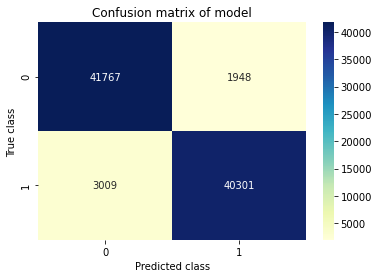

In [110]:
cf_matrix = confusion_matrix(y_test, y_pred_mlp)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [111]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     43715
           1       0.95      0.93      0.94     43310

    accuracy                           0.94     87025
   macro avg       0.94      0.94      0.94     87025
weighted avg       0.94      0.94      0.94     87025



In [112]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp= auc(fpr_mlp, tpr_mlp)
precision_mlp, recall_mlp, th_mlp = precision_recall_curve(y_test, y_pred_mlp)

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=26,criterion='entropy',max_features=38)

dt = dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
dt_acc=accuracy_score(y_test, y_pred_dt)
print(dt_acc)

0.9565527147371445


In [86]:
dt_accuracy="%.3f" %round(accuracy_score(y_test, y_pred_dt),3)
dt_prec="%.3f" %round(precision_score(y_test, y_pred_dt),3)
dt_rec="%.3f" %round(recall_score(y_test, y_pred_dt),3)
dt_f1="%.3f" %round(f1_score(y_test, y_pred_dt),3)
dt_lgloss="%.3f" %round(log_loss(y_test, y_pred_dt),3)
dt_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_dt),3)

In [87]:
joblib.dump(dt, "dt.joblib")

['dt.joblib']

Text(0.5, 1.0, 'Confusion matrix of model')

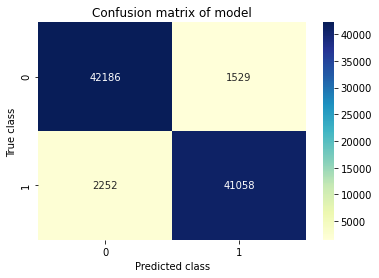

In [88]:
cf_matrix = confusion_matrix(y_test, y_pred_dt)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [89]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     43715
           1       0.96      0.95      0.96     43310

    accuracy                           0.96     87025
   macro avg       0.96      0.96      0.96     87025
weighted avg       0.96      0.96      0.96     87025



In [90]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt= auc(fpr_dt, tpr_dt)
precision_dt, recall_dt, th_dt = precision_recall_curve(y_test, y_pred_dt)

In [119]:
from IPython.display import display
dict={'Model' :["LogisticRegression","Artificialneuralnetwork","MultilayerPerceptron","DecisionTree","RandomForest","XGBoost"],
     'Accuracy' :[log_acc,ann_acc,mlp_acc,dt_accuracy,rf_accuracy,xgb_accuracy],
     'Precision':[log_prec,ann_prec,mlp_prec,dt_prec,rf_prec,xgb_prec],
     'Recall' :[log_rec,ann_rec,mlp_rec,dt_rec,rf_rec,xgb_rec],
     'F1 score' :[log_f1,ann_f1,mlp_f1,dt_f1,rf_f1,xgb_f1],
     'Log loss' :[log_lgloss,ann_lgloss,mlp_lgloss,dt_lgloss,rf_lgloss,xgb_lgloss], 
     'ROCAUC' :[log_rocauc,ann_rocauc,mlp_rocauc,dt_rocauc,rf_rocauc,xgb_rocauc]}

df = pd.DataFrame({ key:pd.Series(value) for key, value in dict.items() })

display(df)


,Model,Accuracy,Precision,Recall,F1 score,Log loss,ROCAUC
0,LogisticRegression,0.894,0.876,0.918,0.896,3.648,0.894
1,Artificialneuralnetwork,0.951,1.000,0.943,0.950,1.692,0.951
2,MultilayerPerceptron,0.943,0.954,0.931,0.942,1.967,0.943
3,DecisionTree,0.957,0.964,0.948,0.956,1.501,0.957
4,RandomForest,0.966,0.971,0.960,0.966,1.168,0.966
5,XGBoost,0.968,0.973,0.963,0.968,1.098,0.968


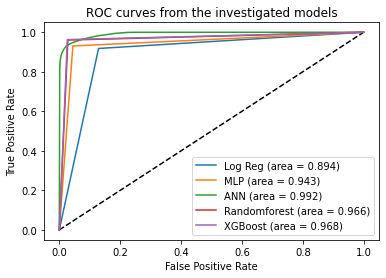

In [114]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, label='Log Reg (area = %0.3f)' % roc_auc_log)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = %0.3f)' % roc_auc_mlp)
plt.plot(fpr_ann, tpr_ann, label='ANN (area = %0.3f)' % roc_auc_ann)
plt.plot(fpr_rf, tpr_rf, label='Randomforest (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

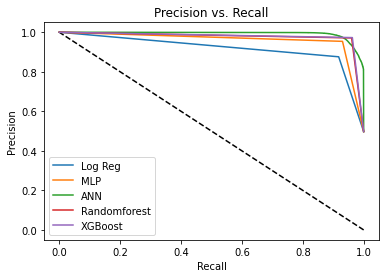

In [115]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_log, precision_log, label='Log Reg')
plt.plot(recall_mlp, precision_mlp, label='MLP')
plt.plot(recall_ann, precision_ann, label='ANN')
plt.plot(recall_rf, precision_rf, label='Randomforest')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()